# NLP Preprocessing with NLTK

This notebook demonstrates various Natural Language Processing (NLP) preprocessing techniques using the Natural Language Toolkit (NLTK) library. We'll cover essential preprocessing steps that are commonly used in NLP tasks.

NLP is a dynamic field briging the critical gap between human natural language and computers.

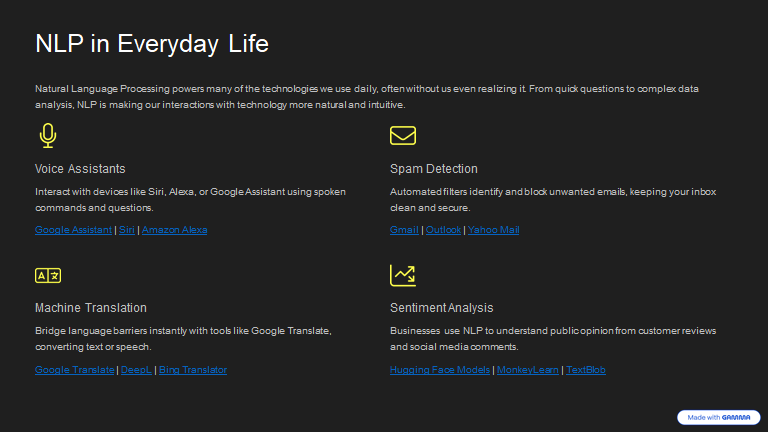

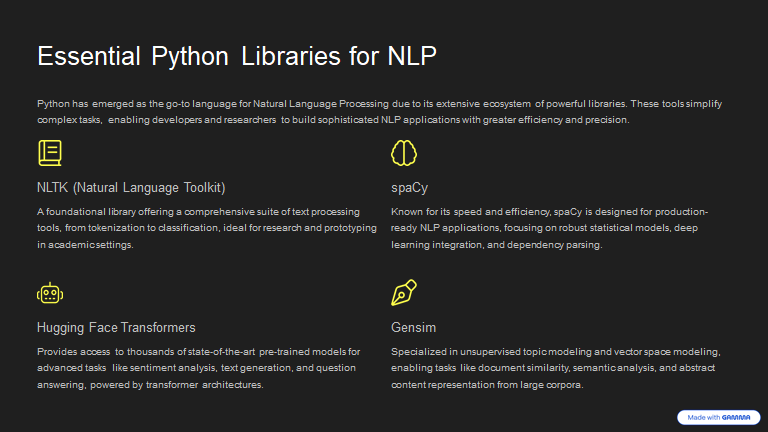

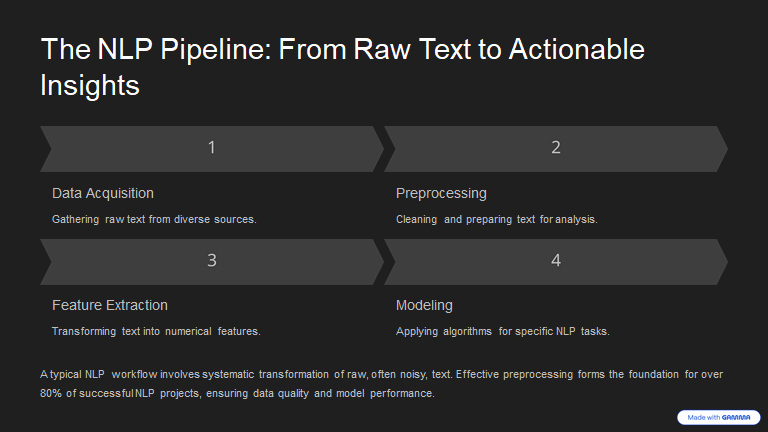

## 1. Setup and Installation

First, we need to install NLTK and download the required data packages. If you haven't installed NLTK yet, you can install it using pip:
```bash
pip install nltk
```

In [12]:
import nltk

# Download required NLTK data packages
nltk.download('punkt_tab')        # For tokenization
nltk.download('stopwords')    # For stopword removal
nltk.download('wordnet')      # For lemmatization
nltk.download('averaged_perceptron_tagger_eng')  # For POS tagging

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


## 2. Text Preprocessing Functions

Let's import the necessary NLTK modules and create some utility functions for text preprocessing:

In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Sample text for demonstration
sample_text = """Natural Language Processing (NLP) is a fascinating field of artificial intelligence.
It helps computers understand, interpret, and manipulate human language.
The applications of NLP are growing rapidly, from chatbots to translation services."""

## 3. Tokenization

Tokenization is the process of breaking down text into individual words (tokens) or sentences. NLTK provides two main functions for tokenization:
- `word_tokenize()`: Splits text into words
- `sent_tokenize()`: Splits text into sentences

In [5]:
# Sentence tokenization
sentences = sent_tokenize(sample_text)
print("Sentences:")
for i, sent in enumerate(sentences, 1):
    print(f"{i}. {sent}")

print("\nWord tokenization:")
words = word_tokenize(sample_text)
print(f"Total words: {len(words)}")
print("First 20 words:", words[:20])

Sentences:
1. Natural Language Processing (NLP) is a fascinating field of artificial intelligence.
2. It helps computers understand, interpret, and manipulate human language.
3. The applications of NLP are growing rapidly, from chatbots to translation services.

Word tokenization:
Total words: 40
First 20 words: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'fascinating', 'field', 'of', 'artificial', 'intelligence', '.', 'It', 'helps', 'computers', 'understand', ',', 'interpret']


## 4. Stopword Removal

Stopwords are common words that typically don't contribute much to the meaning of a text (e.g., "the", "is", "at", "which"). Removing them can help focus on the important words in the text.

In [6]:
# Get English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from our tokenized words
words_no_stop = [word for word in words if word.lower() not in stop_words]

print("Original words count:", len(words))
print("Words count after stopword removal:", len(words_no_stop))
print("\nFirst 20 words without stopwords:", words_no_stop[:20])

Original words count: 40
Words count after stopword removal: 30

First 20 words without stopwords: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'fascinating', 'field', 'artificial', 'intelligence', '.', 'helps', 'computers', 'understand', ',', 'interpret', ',', 'manipulate', 'human', 'language']


## 5. Stemming

Stemming is the process of reducing words to their root or base form. For example, "running" becomes "run", "fishes" becomes "fish". NLTK provides several stemmers, and we'll use the Porter Stemmer, which is the most commonly used.

In [7]:
# Create a Porter Stemmer instance
porter = PorterStemmer()

# Stem the words
stemmed_words = [porter.stem(word) for word in words_no_stop]

# Compare original and stemmed words
print("Original vs Stemmed words:")
for orig, stemmed in zip(words_no_stop[:10], stemmed_words[:10]):
    print(f"{orig:15} -> {stemmed}")

Original vs Stemmed words:
Natural         -> natur
Language        -> languag
Processing      -> process
(               -> (
NLP             -> nlp
)               -> )
fascinating     -> fascin
field           -> field
artificial      -> artifici
intelligence    -> intellig


## 6. Lemmatization

Lemmatization is similar to stemming but gives more meaningful results by using vocabulary and morphological analysis to return the dictionary base form of a word (lemma). For example, "better" becomes "good", while stemming might not handle such cases correctly.

In [8]:
# Create a WordNet Lemmatizer instance
lemmatizer = WordNetLemmatizer()

# Lemmatize words
lemmatized_words = [lemmatizer.lemmatize(word) for word in words_no_stop]

# Compare original, stemmed, and lemmatized words
print("Original vs Stemmed vs Lemmatized words:")
for orig, stemmed, lemma in zip(words_no_stop[:10], stemmed_words[:10], lemmatized_words[:10]):
    print(f"{orig:15} -> {stemmed:15} -> {lemma}")

Original vs Stemmed vs Lemmatized words:
Natural         -> natur           -> Natural
Language        -> languag         -> Language
Processing      -> process         -> Processing
(               -> (               -> (
NLP             -> nlp             -> NLP
)               -> )               -> )
fascinating     -> fascin          -> fascinating
field           -> field           -> field
artificial      -> artifici        -> artificial
intelligence    -> intellig        -> intelligence


## 7. Part-of-Speech (POS) Tagging

POS tagging is the process of marking up words in a text with their corresponding part of speech (noun, verb, adjective, etc.). This is useful for word sense disambiguation and further text analysis.

In [11]:
# Perform POS tagging on the original words
pos_tags = nltk.pos_tag(words)

# Print the first 20 words with their POS tags
print("Words with POS tags:")
for word, tag in pos_tags[:20]:
    print(f"{word:15} -> {tag}")

# Quick reference for common POS tags
pos_reference = """
Common POS tags:
- NN: Noun, singular
- NNS: Noun, plural
- VB: Verb, base form
- VBD: Verb, past tense
- JJ: Adjective
- RB: Adverb
- IN: Preposition
- DT: Determiner
"""
print(pos_reference)

Words with POS tags:
Natural         -> JJ
Language        -> NNP
Processing      -> NNP
(               -> (
NLP             -> NNP
)               -> )
is              -> VBZ
a               -> DT
fascinating     -> JJ
field           -> NN
of              -> IN
artificial      -> JJ
intelligence    -> NN
.               -> .
It              -> PRP
helps           -> VBZ
computers       -> NNS
understand      -> VBP
,               -> ,
interpret       -> JJ

Common POS tags:
- NN: Noun, singular
- NNS: Noun, plural
- VB: Verb, base form
- VBD: Verb, past tense
- JJ: Adjective
- RB: Adverb
- IN: Preposition
- DT: Determiner



## 8. Practice with Sample Text

Let's put everything together and process a new piece of text using all the preprocessing steps we've learned.

In [13]:
# New sample text
new_text = """Machine learning algorithms are becoming increasingly sophisticated.
Researchers are developing new models daily, improving the ability of computers to learn from data.
These advancements are revolutionizing many industries!"""

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)

    # Stopword removal
    words_no_stop = [w for w in words if w.lower() not in stop_words]

    # Lemmatization
    lemmatized = [lemmatizer.lemmatize(w) for w in words_no_stop]

    # POS tagging
    pos_tags = nltk.pos_tag(lemmatized)

    return {
        'original_words': words,
        'words_no_stop': words_no_stop,
        'lemmatized': lemmatized,
        'pos_tags': pos_tags
    }

# Process the text
results = preprocess_text(new_text)

# Print results
print("Original text:")
print(new_text)
print("\nProcessing results:")
print(f"Original word count: {len(results['original_words'])}")
print(f"After stopword removal: {len(results['words_no_stop'])}")
print("\nFirst 10 words with their POS tags after preprocessing:")
for word, tag in results['pos_tags'][:10]:
    print(f"{word:15} -> {tag}")

Original text:
Machine learning algorithms are becoming increasingly sophisticated. 
Researchers are developing new models daily, improving the ability of computers to learn from data. 
These advancements are revolutionizing many industries!

Processing results:
Original word count: 32
After stopword removal: 24

First 10 words with their POS tags after preprocessing:
Machine         -> NN
learning        -> VBG
algorithm       -> JJ
becoming        -> VBG
increasingly    -> RB
sophisticated   -> JJ
.               -> .
Researchers     -> NNS
developing      -> VBG
new             -> JJ
